In [1]:
import pandas as pd
import numpy as np
from run_theory import run_theory
import matplotlib.pyplot as plt

In [2]:
# open the file
spi12_amazonia = pd.read_csv('spi_amazonia.csv').set_index('time')

In [3]:
# calculate the severity, duration, intensity and interarrival
run_theory_spi_amazonia = run_theory(spi12_amazonia['spi_gamma_12'],threshold=-1)

In [4]:
# insert the x label
df_index = run_theory_spi_amazonia.Date_ini_drought.to_list()

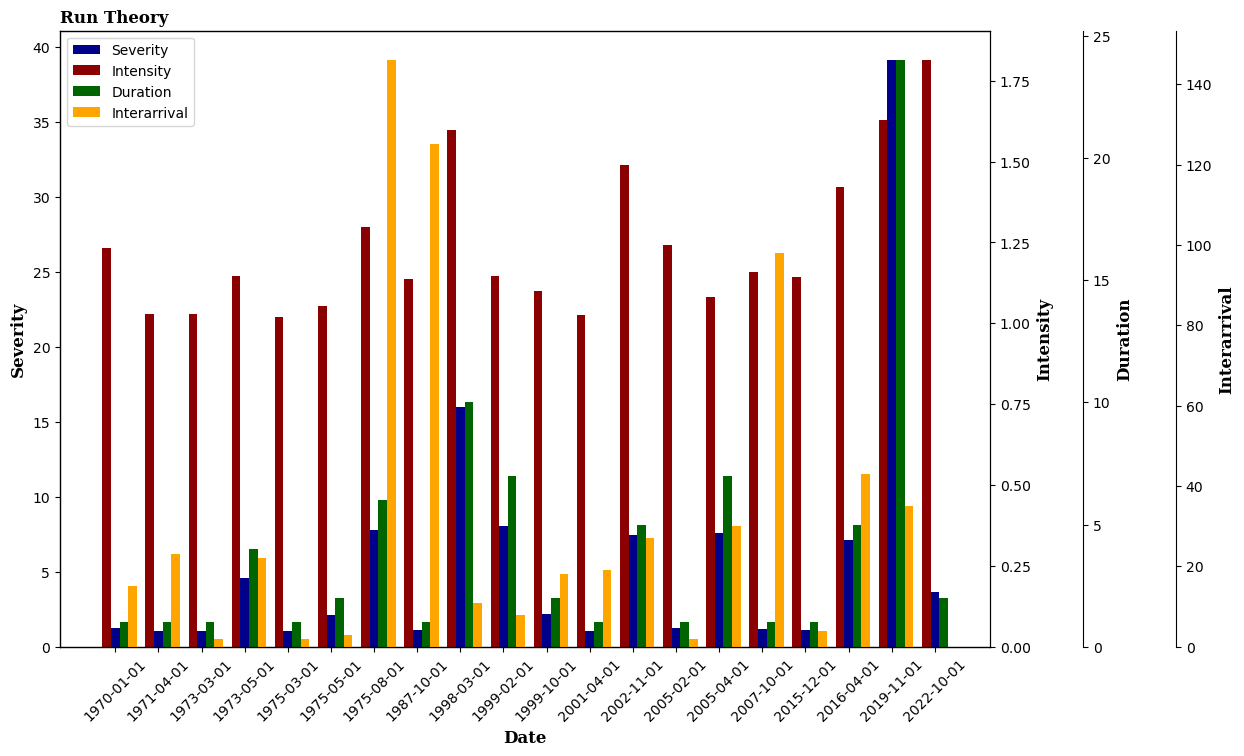

In [35]:
fig, ax = plt.subplots( figsize=(12, 8), sharex=True)
x_len = np.arange(len(run_theory_spi_amazonia))

ax.bar(x_len,run_theory_spi_amazonia.Severity,0.2, label='Severity', color='darkblue')
ax.set_ylabel('Severity', fontsize=12, fontname='serif', fontweight='bold')
# another axis
ax1 = ax.twinx()
ax1.bar(x_len-0.2,run_theory_spi_amazonia.Intensity, 0.2,label='Intensity',color='darkred')
ax1.set_ylabel('Intensity', fontsize=12, fontname='serif', fontweight='bold')
# another axis
ax2 = ax.twinx()
ax2.bar(x_len+0.2,run_theory_spi_amazonia.Duration, 0.2,label='Duration', color='darkgreen')
ax2.set_ylabel('Duration', fontsize=12, fontname='serif', fontweight='bold')
# deslocate another axis
ax2.spines['right'].set_position(('axes', 1.1))
#plot another axis
ax3 = ax.twinx()
ax3.bar(x_len+0.4,run_theory_spi_amazonia.Interarrival, 0.2,label='Interarrival', color='orange')
ax3.spines['right'].set_position(('axes', 1.2))
ax3.set_ylabel('Interarrival', fontsize=12, fontname='serif', fontweight='bold')
# set xticks from list
ax.set_xticks(x_len)
# set xtickslabels from list
ax.set_xticklabels(df_index, rotation=45)
# set legend
# make the legend manual
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax3.get_legend_handles_labels()
ax.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='upper left')
ax.set_title('Run Theory', fontsize=12, fontname='serif', fontweight='bold',loc='left')
ax.set_xlabel('Date', fontsize=12, fontname='serif', fontweight='bold')
fig.savefig('run_theory_spi.png', dpi=300, bbox_inches='tight')